In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

## PolyA gene detection

What fraction of polyA genes from the annotation do we detect with >= 1 TPM in any library?

In [3]:
df = pd.read_csv('human_talon_abundance.tsv', sep='\t')
df, inds = get_tpm_table(df,
                   how='gene',
                   min_tpm=1,
                   gene_subset='polya')

Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1295: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1294: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 34027


In [4]:
gene_df, b_counts, b_cat_counts = get_gtf_info(how='gene')

In [5]:
polya_biotypes = ['protein_coding', 'pseudogene', 'lncRNA']
polya_genes = gene_df.loc[gene_df.biotype_category.isin(polya_biotypes), 'gid'].tolist()
n_polya = len(polya_genes)
n_det_polya = len(df.index)

print('Detected {} / {} ({:.3}%) annotated polyA genes'.format(n_det_polya, n_polya, (n_det_polya/n_polya)*100))

Detected 34027 / 49472 (68.8%) annotated polyA genes


In [6]:
gene_df, _, _ = get_gtf_info(how='gene', subset='polya')
gene_df = gene_df[['gid', 'gname', 'biotype_category']]
df = df.merge(gene_df, how='left', left_index=True, right_on='gid')

df = df[['gid', 'biotype_category']].groupby('biotype_category').count()
df.rename({'gid':'obs_counts'}, axis=1, inplace=True)

gene_df = gene_df[['gid', 'biotype_category']].groupby('biotype_category').count()
gene_df.rename({'gid':'annot_counts'}, axis=1, inplace=True)
df = df.merge(gene_df, how='left', left_index=True, right_index=True)

df['perc'] = (df.obs_counts/df.annot_counts)*100
df = df.sort_values(by='perc', ascending=False)
df

,obs_counts,annot_counts,perc
biotype_category,,,
protein_coding,18847,19969,94.381291
lncRNA,10845,15006,72.271092
pseudogene,4335,14497,29.902738


How many polyA genes do we detect >= 100 TPM in any 1 sample? 

In [7]:
df = pd.read_csv('human_talon_abundance.tsv', sep='\t')
df, inds = get_tpm_table(df,
                   groupby='sample',
                   how='gene',
                   min_tpm=100,
                   gene_subset='polya')


gene_df, _, _ = get_gtf_info(how='gene', subset='polya')
polya_biotypes = ['protein_coding', 'pseudogene', 'lncRNA']
polya_genes = gene_df.loc[gene_df.biotype_category.isin(polya_biotypes), 'gid'].tolist()
n_polya = len(polya_genes)
n_det_polya = len(df.index)

print('Detected {} / {} ({:.3}%) annotated polyA genes'.format(n_det_polya, n_polya, (n_det_polya/n_polya)*100))

gene_df, _, _ = get_gtf_info(how='gene', subset='polya')
gene_df = gene_df[['gid', 'gname', 'biotype_category']]
df = df.merge(gene_df, how='left', left_index=True, right_on='gid')

df = df[['gid', 'biotype_category']].groupby('biotype_category').count()
df.rename({'gid':'obs_counts'}, axis=1, inplace=True)

gene_df = gene_df[['gid', 'biotype_category']].groupby('biotype_category').count()
gene_df.rename({'gid':'annot_counts'}, axis=1, inplace=True)
df = df.merge(gene_df, how='left', left_index=True, right_index=True)

df['perc'] = (df.obs_counts/df.annot_counts)*100
df = df.sort_values(by='perc', ascending=False)
df

Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1295: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1294: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 100 tpm: 11176
Applying gene type and novelty subset
Averaging over biosample
Found 50 total samples
Number of genes reported: 10148
Detected 10148 / 49472 (20.5%) annotated polyA genes


,obs_counts,annot_counts,perc
biotype_category,,,
protein_coding,9794,19969,49.046021
lncRNA,255,15006,1.699320
pseudogene,99,14497,0.682900


In [7]:
df.head()

,obs_counts,annot_counts,perc
biotype_category,,,
protein_coding,9794,19969,49.046021
lncRNA,255,15006,1.699320
pseudogene,99,14497,0.682900


In [8]:
gene_df, _, _ = get_gtf_info(how='gene', subset='polya')
gene_df = gene_df[['gid', 'gname', 'biotype']]
df = df.merge(gene_df, how='left', left_index=True, right_on='gid')

In [9]:
df.to_csv('polya_genes_100tpm.tsv', sep='\t', index=False)

In [10]:
df = pd.read_csv('polya_genes_100tpm.tsv', sep='\t')

In [11]:
df.loc[df.gname == 'MAP4K4']

,obs_counts,annot_counts,perc,gid,gname,biotype


## How many genes of each biotype category are there in the annotation and detected by us?

In [12]:
# get detected genes w/o subsetting on polyA genes
df = pd.read_csv('human_talon_abundance.tsv', sep='\t')
df, _ = get_tpm_table(df,
                   how='gene',
                   min_tpm=1)
gene_df, b_counts, b_cat_counts = get_gtf_info(how='gene')

Calculating gene TPM values
Subsetting for novelty categories ['Known']


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1094: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1093: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 36032


In [13]:
df = df.merge(gene_df, how='left', left_index=True, right_on='gid')
temp = df[['gid', 'biotype_category']].groupby('biotype_category').count()
temp.reset_index(inplace=True)
temp.rename({'gid': 'detected_counts'}, axis=1, inplace=True)

temp = temp.merge(b_cat_counts, on='biotype_category', how='outer')
temp['prop_detected'] = temp.detected_counts/temp.gencode_counts
temp.sort_values(by='prop_detected', ascending=False, inplace=True)
temp

,biotype_category,detected_counts,gencode_counts,prop_detected
3,protein_coding,18847,19969,0.943813
0,lncRNA,10845,15006,0.722711
4,pseudogene,4335,14497,0.299027
2,other,1700,7426,0.228925
1,miRNA,305,1881,0.162148


## How many genes in other biotype categories do we detect and what proportion of the annotation does this represent?

In [14]:
temp = df[['gid', 'biotype', 'biotype_category']].groupby(['biotype', 'biotype_category']).count()
temp.reset_index(inplace=True)
temp.rename({'gid': 'detected_counts'}, axis=1, inplace=True)

temp = temp.merge(b_counts, on='biotype', how='outer')
temp['prop_detected'] = temp.detected_counts/temp.gencode_counts
temp.sort_values(by='prop_detected', ascending=False, inplace=True)

Protein coding genes

In [16]:
temp

,biotype,biotype_category,detected_counts,gencode_counts,prop_detected
20,non_coding,lncRNA,2.0,2,1.000000
29,scRNA,other,1.0,1,1.000000
6,Mt_rRNA,other,2.0,2,1.000000
1,IG_C_gene,other,14.0,14,1.000000
9,TR_C_gene,other,6.0,6,1.000000
17,macro_lncRNA,lncRNA,1.0,1,1.000000
15,bidirectional_promoter_lncRNA,lncRNA,69.0,73,0.945205
24,protein_coding,protein_coding,18847.0,19969,0.943813
23,processed_transcript,lncRNA,543.0,601,0.903494
36,transcribed_unitary_pseudogene,pseudogene,104.0,124,0.838710


"Other" genes

In [17]:
temp.loc[temp.biotype_category == 'other']

,biotype,biotype_category,detected_counts,gencode_counts,prop_detected
29,scRNA,other,1.0,1,1.000000
6,Mt_rRNA,other,2.0,2,1.000000
1,IG_C_gene,other,14.0,14,1.000000
9,TR_C_gene,other,6.0,6,1.000000
7,Mt_tRNA,other,11.0,22,0.500000
8,TEC,other,502.0,1060,0.473585
28,ribozyme,other,3.0,8,0.375000
2,IG_C_pseudogene,other,3.0,9,0.333333
26,rRNA,other,19.0,58,0.327586
12,TR_V_gene,other,31.0,106,0.292453


Psuedogenes

In [18]:
temp.loc[temp.biotype_category == 'pseudogene']

,biotype,biotype_category,detected_counts,gencode_counts,prop_detected
36,transcribed_unitary_pseudogene,pseudogene,104.0,124,0.838710
37,transcribed_unprocessed_pseudogene,pseudogene,648.0,885,0.732203
35,transcribed_processed_pseudogene,pseudogene,278.0,481,0.577963
38,translated_processed_pseudogene,pseudogene,1.0,2,0.500000
21,polymorphic_pseudogene,pseudogene,20.0,41,0.487805
25,pseudogene,pseudogene,9.0,22,0.409091
39,unitary_pseudogene,pseudogene,29.0,95,0.305263
22,processed_pseudogene,pseudogene,2585.0,10198,0.253481
40,unprocessed_pseudogene,pseudogene,661.0,2649,0.249528


## Differences in lengths of detected vs. non detected genes

Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1094: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1093: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 34027


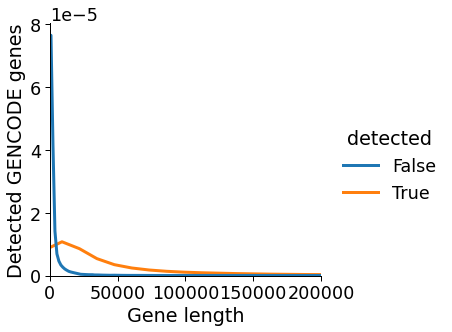

In [19]:
df = pd.read_csv('human_talon_abundance.tsv', sep='\t')
df = plot_det_len_kde(df, 
                      how='gene', 
                      subset='polya',
                      min_tpm=1,
                      xlim=200000,
                      opref='figures/')

In [20]:
# save this for narges
df.to_csv('det_polya_genes_len.tsv', sep='\t')

## GO on *protein coding* genes that are not detected at >= 1 TPM

In [3]:
# get detected genes w/o subsetting on polyA genes
df = pd.read_csv('human_talon_abundance.tsv', sep='\t')
df, _ = get_tpm_table(df,
                   how='gene',
                   min_tpm=1, 
                   gene_subset='polya')
df['detected'] = True

Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1854: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1853: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 33772


In [4]:
gene_df, b_counts, b_cat_counts = get_gtf_info(how='gene')
df = df.merge(gene_df, how='outer', left_index=True, right_on='gid')
df.detected = df.detected.fillna(False)

In [5]:
print(len(df.index))
df = df.loc[df.biotype_category == 'protein_coding']
print(len(df.index))

95316
19988


In [6]:
dbs = ['GO_Biological_Process_2021',
       'GO_Cellular_Component_2021',
       'GO_Molecular_Function_2021',
       'KEGG_2021_Human']
bm = gp.parser.Biomart()
datasets = bm.get_datasets(mart='ENSEMBL_MART_ENSEMBL')
datasets.loc[datasets.Description.str.contains('Human')]

,Name,Description
203,hsapiens_gene_ensembl,Human genes (GRCh38.p13)


In [7]:
gids = df.loc[~df.detected, 'gid'].str.rsplit('.', n=1, expand=True)[0].to_frame()
gids = gids.squeeze().str.strip().tolist()
gids = bm.query(dataset='hsapiens_gene_ensembl',
           attributes=['ensembl_gene_id', 'external_gene_name'],
           filters={'ensembl_gene_id': gids})
gids = gids.loc[~gids.external_gene_name.isna()]
gnames = gids.external_gene_name.squeeze().str.strip().tolist()
go = gp.enrichr(gene_list=gnames,
                gene_sets=dbs,
                organism='Human',
                description='undet_genes',
                outdir='undet_genes_GO',
                cutoff=0.5)

In [ ]:
# GO plots

## How many biosamples do we detect each detected gene in?

Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1094: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1093: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Number of genes reported: 34027
Found 50 total samples


biosample,a673,adipose,adrenal gland,brain,caco2,calu3,colon,gm12878,h1,h1_de,...,panc1,pc3,pc9,pgp1,pgp1_astro,pgp1_endo,pgp1_excite_neuron,vessels,wtc11,n_samples
ENSG00000000003.14,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,41
ENSG00000000005.5,False,True,False,True,False,False,True,False,True,False,...,False,False,False,True,False,True,False,True,True,16
ENSG00000000419.12,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,50
ENSG00000000457.13,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,50
ENSG00000000460.16,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285986.1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
ENSG00000285987.1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3
ENSG00000285988.1,False,False,False,False,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,11
ENSG00000285990.1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,7


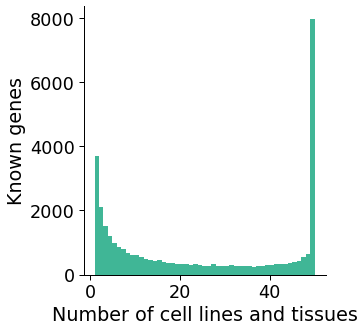

In [26]:
df = pd.read_csv('human_talon_abundance.tsv', sep='\t')
plot_biosamp_det(df,
                 how='gene',
                 min_tpm=1,
                 gene_subset='polya',
                 sample=None,
                 groupby='sample',
                 nov='Known',
                 opref='figures/human')